
- [ ] [Packages and data import](#import_package)
- [ ] [section 2 High level overview of columns](#high_level_overview_of_columns)
- [ ] [section 3 Identify missing data ](#identify-missing_Data)
- [ ] [section 4 Handling missing data ](#handling-missing_Data)
- [ ] [distributions examinination and description](#dist_exam_and_describe)
- [ ] [Section  - Refeneces](#References)


- [x]Are missing values imputed appropriately?
- [ ]Are distributions examined and described?
- [ ]Are outliers identified and addressed?
- [ ]Are appropriate summary statistics provided?
- [ ]Are steps taken during data cleaning and EDA framed appropriately?
- [ ]Does the student address whether or not they are likely to be able to answer their problem statement with the -provided data given what they've discovered during EDA?

<a id="import_package>
### Section 1: Packages and data import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install missingno  # install the library
import missingno as msno  # import the reference to the library
%matplotlib inline

In [2]:
df =pd.read_csv("../datasets/train.csv")
df.shape  # (rows, columns) - 2051, 81

(2051, 81)

<a id="high_level_overview_of_columns">
    
### Section 2: High level  overview of columns
A detailed dictionary can be found under the documents folder.Following tables provide a quick summary of data available.
There are 78 attributes of a house provided.


|Feature|Type|Description|
|---|---|---|
|state|object|SAT|
|Id|  |  | 
|PID|  |  | 
|MS SubClass|  |  Identifies the type of dwelling involved in the sale.| 
|MS Zoning|  | Identifies the general zoning classification of the sale | 
|Lot Frontage|  | Linear feet of street connected to property | 
|Lot Area|  |  Lot size in square feet|
|Street|  | Type of road access to property | 
|Alley|  | Type of alley access to property | 
|Lot Shape|  | General shape of property | 
|Land Contour|  | Flatness of the property | 
|Utilities|  |  Type of utilities available|
|Lot Config|  | Lot configuration | 
|Land Slope|  | Slope of property | 
|Neighborhood|  |Physical locations within Ames city limits  | 
|Condition 1|  | Proximity to various conditions |
|Condition 2|  | Proximity to various conditions (if more than one is present) | 
|Bldg Type|  |  Type of dwelling| '
|House Style|  | Style of dwelling | 
|Overall Qual|  | Rates the overall material and finish of the house |
|Overall Cond|  |Rates the overall condition of the house  | 
|Year Built|  | Original construction date | 
|Year Remod/Add|  | Remodel date (same as construction date if no remodeling or additions) | 
|Roof Style|  |  Type of roof|
|Roof Matl|  | Roof material | 
|Exterior 1st|  | Exterior covering on house | 
|Exterior 2nd|  | Exterior covering on house (if more than one material) | 
|Mas Vnr Type|  | Masonry veneer type |
|Mas Vnr Area|  | Masonry veneer area in square feet | 
|Exter Qual|  | Evaluates the quality of the material on the exterior | 
|Exter Cond|  | Evaluates the present condition of the material on the exterior | 
|Foundation|  | Type of foundation | 
|Bsmt Qual|  |  Evaluates the height of the basement|
|Bsmt Cond|  |  Evaluates the general condition of the basement| 
|Bsmt Exposure|  | Refers to walkout or garden level walls | 
|BsmtFin Type 1|  | Rating of basement finished area | 
|BsmtFin SF 1|  | Type 1 finished square feet |
|BsmtFin Type 2|  |Rating of basement finished area (if multiple types)  | 
|BsmtFin SF 2|  | Type 2 finished square feet | 
|Bsmt Unf SF|  | Unfinished square feet of basement area | 
|Total Bsmt SF|  |Total square feet of basement area  |
|Heating|  | Type of heating | 
|Heating QC|  | Heating quality and condition | 
|Central Air|  | Central air conditioning | 
|Electrical|  | Electrical system | 
|1st Flr SF|  |  First Floor square feet|
|2nd Flr SF|  | Second floor square feet | 
|Low Qual Fin SF|  | Low quality finished square feet (all floors) | 
|Gr Liv Area|  | Above grade (ground) living area square feet | 
|Bsmt Full Bath|  | Basement full bathrooms |
|Bsmt Half Bath|  | Basement half bathrooms | 
|Full Bath|  |  Full bathrooms above grade| 
|Half Bath|  |  Half baths above grade| 
|Bedroom AbvGr|  | Bedrooms above grade (does NOT include basement bedrooms) |
|Kitchen AbvGr|  | Kitchens above grade | 
|Kitchen Qual|  | Kitchen quality | 
|TotRms AbvGrd|  | Total rooms above grade (does not include bathrooms) | 
|Functional|  |  Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|  |  Number of fireplaces| 
|Fireplace Qu|  | Fireplace quality | 
|Garage Type|  | Garage location | 
|Garage Yr Blt|  | Year garage was built |
|Garage Finish|  | Interior finish of the garage | 
|Garage Cars|  | Size of garage in car capacity | 
|Garage Area|  | Size of garage in square feet | 
|Garage Qual|  | Garage quality |
|Garage Cond|  | Garage condition | 
|Paved Drive|  | Paved driveway | 
|Wood Deck SF|  | Wood deck area in square feet | 
|Open Porch SF|  | Open porch area in square feet |
|Enclosed Porch|  | Enclosed porch area in square feet | 
|3Ssn Porch|  | Three season porch area in square feet | 
|Screen Porch|  | Screen porch area in square feet | 
|Pool Area|  |  Pool area in square feet| 
|**Pool QC** | string | Pool quality |
|Fence|  | Fence quality | 
|Misc Feature|  | Miscellaneous feature not covered in other categories  | 
|Misc Val|  |  $Value of miscellaneous feature| 
|Mo Sold|  |  Month Sold (MM)| 
|Yr Sold|  |  Year Sold (YYYY)| 
|Sale Type|  | Type of sale |
|SalePrice|  |  Condition of sale|

### Section 3 Identify missing data  <a id='identify-missing_Data'></a>

The  following query identifies the missing columns.
26 columns  out of 78 feature columns have atlease one more missing values.
 
###### Categorical columns with missing data  are as follows
Pool Q,
Fence,
Misc Feature
Alley',
Fireplace Qu, 
Mas Vnr Type', 
'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2', 
'Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond', 

In [3]:
df[df.columns[df.isnull().any()]].select_dtypes(exclude ="number").columns

Index(['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

###### Numerical columns with missing data
Lot Frontage', 'Mas Vnr Area',
'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
'Garage Yr Blt', 'Garage Cars', 'Garage Area'

In [4]:
df[df.columns[df.isnull().any()]].select_dtypes(include ="number").columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

###### Missing columns with highest to lowest in ratio

In [5]:
column_null_counts = df.isnull().sum() *100/ len(df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Cars        0.048757
BsmtFin SF 1       0.048757
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Garage Area        0.048757
Total Bsmt SF      0.048757
dtype: float64

|Feature|percent missing |description|options|
|---|---|---|---|
| Pool QC|99.56| Pool quality | Ex -Excellent, Gd- Good,TA-Average/Typical,Fa-Fair,NA-No Pool|
|Misc Feature|96.83| Miscellaneous feature not covered in other categories|Elev-Elevator, Gar2-2nd Garage (if not described in garage section, Othr-Other, Shed-Shed (over 100 SF)TenC-Tennis Court,NA-None|
|Alley|93.17|Type of alley access to property|Grvl-Gravel,Pave-Paved, NA-No alley access|
|Fence| 80.49|Fence quality| GdPrv- Good Privacy,MnPrv-Minimum Privacy,GdWo	Good Wood,MnWw-Minimum Wood/Wire,NA	No Fence|
|Fireplace Qu|48.75|Fireplace quality|Ex-Excellent Exceptional Masonry Fireplace,Gd-Good - Masonry Fireplace in main level,TA-Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement ,Fa-Fair - Prefabricated Fireplace in basement, Po	Poor - Ben Franklin Stove,NA-No Fireplace

### Section 4 Handling missing data  <a id='handling-missing_Data'></a>
There are total 26 features that has missing atleast a value. Also , while most of the  columns have missing data less than 5  percent. There are 5 features where very high number of data is missing. Multiple stragtegies were  employed to impute or drop data and  we will disucss each column and the reasonings here .

###### 1. Pool  and Fireplace  , Garage and basement   attributes were set to 'NA' when the pool or fireplace , garage or basement itself didn't exist.


In [6]:
# Imputing missing column Pool quality
# The records in question show 'pool area' =0  so there is no pool as  hence  it is safe to set NA  for Pool quality.
missing_pool_quality = df['Pool QC'].isnull()
pool_missing_quality_with_area_not_zero = (missing_pool_quality) & (df['Pool Area'] >0)
df.loc[ (missing_pool_quality & (df['Pool Area'] ==0)),'Pool QC'] ='NA'

# Imputing missing column fireplace Quality
#The records in question show that there is no fireplace hence setting quality to NA.
missing_fireplace_quality =df['Fireplace Qu'].isnull()
missing_quality_when_no_fireplace =(missing_fireplace_quality) & (df['Fireplaces']==0)
df.loc[missing_quality_when_no_fireplace,'Fireplace Qu'] ='NA'

garage_area_zero = df['Garage Area'] == 0
df.loc[(garage_area_zero & (df['Garage Cond'].isnull())),'Garage Cond'] ='NA'
df.loc[(garage_area_zero & (df['Garage Finish'].isnull())),'Garage Finish'] ='NA'
df.loc[(garage_area_zero & (df['Garage Yr Blt'].isnull())),'Garage Yr Blt'] =0
df.loc[(garage_area_zero & (df['Garage Qual'].isnull())),'Garage Qual'] ='NA'
df.loc[(garage_area_zero & (df['Garage Type'].isnull())),'Garage Type'] ='NA'

zero_total_sqft_basement_area = df['Total Bsmt SF'] ==0  #Total square feet of basement area
df.loc[ (zero_total_sqft_basement_area & (df['BsmtFin Type 2'].isnull())) ,'BsmtFin Type 2']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['BsmtFin Type 1'].isnull())) ,'BsmtFin Type 1']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['Bsmt Qual'].isnull())) ,'Bsmt Qual']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['Bsmt Cond'].isnull())) ,'Bsmt Cond']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['Bsmt Exposure'].isnull())) ,'Bsmt Exposure']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['Bsmt Half Bath'].isnull())) ,'Bsmt Half Bath']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['Bsmt Full Bath'].isnull())) ,'Bsmt Full Bath']='NA' #NA	No Basement
df.loc[ (zero_total_sqft_basement_area & (df['Bsmt Unf SF'].isnull())) ,'Bsmt Unf SF']='NA' #NA	No Basement

###### 2. columns 'Misc Feature' and  'Alley'  and 'Fence'
indicates if house has any misclleneous feature which is  not covered  and type of access to alley. 
With 96% and 93% and 80 % missing data for the three columns .I  decided to assign no  NA for houses that were missing this information - as there is a high likelihood that houses that had no features and hence were left empty.

In [7]:
missing_misc_feature = df['Misc Feature'].isnull()
df.loc[missing_misc_feature, 'Misc Feature'] ='NA'

missing_alley =df['Alley'].isnull()
df.loc[missing_alley, 'Alley'] ='NA'

missing_fence =df['Fence'].isnull()
#df.drop(columns =['Misc Feature','Alley'],inplace =True)
df.loc[missing_fence, 'Fence'] ='NA'

###### 2. column  'Lot  frontage'  is  width of a lot, measured at the front part of the lot for a house.
It would make sense that lot width and lot area are co-related calculating area would depend on width.
Following scatter plot also demonstrates a positive , perhaps weak co-relation between the two.
So I decided to populate the lot frontage using the average lot frontage for houses that have similar area  ( with in +/- 5 percent threshold)

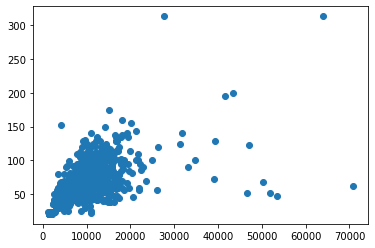

In [8]:
plt.scatter(df['Lot Area'],df['Lot Frontage'])

In [9]:
missing_lot_frontage =df['Lot Frontage'].isnull()
for lot_area in df[missing_lot_frontage]['Lot Area']:
    lower_threshold_bracket =  lot_area-  (lot_area* 5/100)
    upper_threshold_bracket =  lot_area +  (lot_area* 5/100)
    lots_with_given_lot_area = (df['Lot Area'] > lower_threshold_bracket) & (df['Lot Area'] <upper_threshold_bracket)    
    similar_lots_non_missing_frontage_count = len(df[lots_with_given_lot_area  & (~missing_lot_frontage)])
    if similar_lots_non_missing_frontage_count >0: 
       most_common_frontage = df[lots_with_given_lot_area & (~missing_lot_frontage) ]['Lot Frontage'].mean()
       df.loc[ (df['Lot Area'] == lot_area) & missing_lot_frontage ,'Lot Frontage'] =most_common_frontage
        

### Section 4 Handling missing data Iteration 2  ( 1or less than 1 % missing data)<a id='handling-missing_Data_2'></a>

Lets re-run our query to analyze missing column information. We still have very small percent of missing data which we need to assign some number or drop to be able to feed this data to the model.

In [10]:
column_null_counts = df.isnull().sum() *100/ len(df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Mas Vnr Type      1.072647
Mas Vnr Area      1.072647
Bsmt Exposure     0.195027
Lot Frontage      0.146270
BsmtFin Type 2    0.097513
Garage Qual       0.048757
Bsmt Qual         0.048757
Bsmt Cond         0.048757
BsmtFin Type 1    0.048757
BsmtFin SF 1      0.048757
Garage Cond       0.048757
Bsmt Unf SF       0.048757
Total Bsmt SF     0.048757
Bsmt Full Bath    0.048757
Bsmt Half Bath    0.048757
Garage Yr Blt     0.048757
Garage Finish     0.048757
Garage Cars       0.048757
Garage Area       0.048757
BsmtFin SF 2      0.048757
dtype: float64

In [11]:
basement_columns = ['Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure','Bsmt Qual','Bsmt Cond','Bsmt Half Bath','Bsmt Full Bath']
df[df['Bsmt Half Bath'].isnull()][basement_columns]['Total Bsmt SF'].value_counts()


Series([], Name: Total Bsmt SF, dtype: int64)

###### . If to many columns are missing  drop the  rows al-together
My first attempt is to find is multiple columns are empty  and is so then dropping the row than tryign to fill all the values as  hence I am going to drop the following 2 rows.

In [12]:
df= df[~(df['Bsmt Qual'].isnull() &
   df['Bsmt Exposure'].isnull() &
   df['BsmtFin Type 1'].isnull() &
   df['BsmtFin Type 2'].isnull() &
   df['Bsmt Cond'].isnull() &
   df['Total Bsmt SF'].isnull() &
   df['Bsmt Full Bath'].isnull() )
  ]
df =df[~(df['Garage Finish'].isnull() &
   df['Garage Cars'].isnull() &
   df['Garage Area'].isnull() &
   df['Garage Qual'].isnull() &
   df['Garage Cond'].isnull() )
  ]

######   opt in for most conservative option as  no option is  spcified on Masaonary venner type
For Masonry veneer type , among the  four options . None, Brkface,Stone,BrkCmn - I decided to opt for none as that was the most common choice among houses.
Choosing Masonry veneer type  to none will mean the area to be zero

In [13]:
df.loc[df['Mas Vnr Area'].isnull(),'Mas Vnr Area'] = 0
df.loc[df['Mas Vnr Type'].isnull(),'Mas Vnr Type'] = 'None'

######   Replacing these  missing data with  just  a value  without loosing data in  other columns for these row  model can work and we have all numbers,

In [14]:
df['Bsmt Exposure'].fillna('no_clue',inplace =True)
df['Lot Frontage'].fillna("-99",inplace=True)
df['BsmtFin Type 2'].fillna('no_clue',inplace=True)

### Section 5 Distribution examination and description<a id='dist_exam_and_describe'></a>

In [15]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,85.5051,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


### Section 6 Save cleaned data frame  toa file><a id= 'save_cleaned_dataframe></a>

In [16]:
df.to_csv("train_cleaned.csv")

<a id='References'/>

###### References

 General assembly . - EDA Walkthrough  Notebook
 https://www.gimme-shelter.com/frontage-50043/ : width at the front is also known as frontage
 https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca?
 creating table of index : https://sebastianraschka.com/Articles/2014_ipython_internal_links.html
 https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values

In [17]:
missing_data_columns = ['Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                        'Bsmt Qual','Bsmt Cond','BsmtFin SF 1',
                        'Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Yr Blt']
#'Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']
#'Mas Vnr Type','Mas Vnr Area',
#len(df[df.isnull().all(axis=1)][missing_data_columns])
#'Lot Frontage'